<a href="https://colab.research.google.com/github/helgadenes/Bootcamp2025/blob/main/CursoB_Semana2/Spectral_line_decomposition/Tarea_linea_espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea línea espectral


En el tutorial de línea espectral vimos que ajustar 2 gaussianas no es suficiente para modellar los líneas espectrales en el cubo de datos: "gass_161_27_1752534664.fits". El objetivo de este trea es mejorar el modelo.


1. Construir un modelo con 3 componentes gaussianos. Encaja el espectro en uno de los píxeles. Compara el nuevo modelo con los anteriores. ¿Es mejor el nuevo?

2. Construir un modelo con 4 componentes gaussianos. Encaja el espectro en uno de los píxeles. Compara el nuevo modelo con los anteriores. ¿Es mejor el nuevo?

3. Ajuste el modelo de las 4 gaussianas a todos los píxeles.

4. Haz un histograma de todas las velocidades centrales de los componentes gaussianos. Guarde los parámetros del modelo en listas o arrays, para que pueda crear figuras con los datos.

5. Compare los resultados con la descomposición de Gausspy. Los resultados de la descomposición están en el archivo: "Milky_Way_gausspy_results.dat" Este archivo contiene la amplitud, el ancho y la velocidad central de todos los componentes gaussianos.
Puede realizar histogramas, gráficos de dispersión o utilizar otros métodos para comparar los resultados. **¿Son los componentes los mismos? Si hay diferencias, ¿cuál podría ser la razón de la diferencia?**

### Opcional:

6. Crea un modelo con 5 o 6 gaussianas. ¿Este método da el mismo resultado que Gausspy+?

7. Cree un modelo con gaussianas y utilice un método diferente para ajustar el modelo a los datos. ¿Cómo se compara este método con los otros dos modelos?

### Avanzada:

8. Instalar Gausspy+ (https://github.com/mriener/gausspyplus) y descomponer el cubo de datos: "Milky_Way_data_cube.fits" Este es el mismo cubo de datos que en el otro tutorial, pero con metadatos más simples.

Tips:

- Cree un nuevo environment de Conda al instalar Gausspy+.
- Si tiene problemas con los paquetes, Gausspy+ debería funcionar con las siguientes versiones:

  python 3.8.8

  astropy 5.1.1

  lmfit 1.2.2

  matplotlib 3.3.4

  networkx 2.5

  numpy 1.20.1

  scipy 1.6.2

  tqdm 4.59.0

  gsl 0.0.3

- Sigue el cuaderno tutorial (https://github.com/mriener/gausspyplus/blob/master/example/Tutorial_example-GRS.ipynb) para entender cómo ejecutar Gausspy+

- Si el paso 1 del tutorial es demasiado largo, omita los pasos 1 y 2. En este caso, puede utilizar los parámetros alfa predeterminados para el suavizado o, para obtener los mismos resultados que yo, puede utilizar alfa1 = 1.59 y alfa2 = 5.9. Estos parámetros se pueden configurar en el archivo: "step_4-decompose--grs.py"

En caso de cualquier duda mi correo es: hdenes@yachaytech.edu.ec

## Ejemplo para cargar los resultados de la descomposición de GaussPy+

Este ejemplo también crea un histograma de las velocidades centrales de los componentes gaussianos.

In [1]:
# Importing the libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

# this is to access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# location of the data files
directory = '/content/drive/My Drive/Colab_notebooks/'

data = ascii.read(directory+'Milky_Way_gausspy_results.dat')
print(data.keys())

['x_pos', 'y_pos', 'RA', 'DEC', 'amp', 'e_amp', 'VLSR', 'e_VLSR', 'vel_disp', 'e_vel_disp', 'int_tot', 'e_int_tot', 'rms', 'pvalue', 'aicc', 'rchi2', 'ncomps', 'ncomp_wmedian', 'ncomp_jumps', 'flag_blended', 'flag_neg_res_peak', 'flag_broad', 'flag_centroid']


In [10]:
# creating a function to make histograms

def make_histogram(data, name):
    fig = plt.figure(figsize=(10.,7.))
    plt.axes(frameon=False)
    plt.xticks([])
    plt.yticks([])

    ax = fig.add_subplot(1,1,1)
    plt.hist(data, bins=30, histtype='step', color='C0', hatch='\\', linewidth=2)
    plt.xticks(family='serif',size=18)
    plt.yticks(family='serif',size=18)
    ax.set_xlabel('{}'.format(name), size=20,family='serif')
    ax.set_ylabel('N', size=20,family='serif')

    plt.tight_layout()
    plt.show()


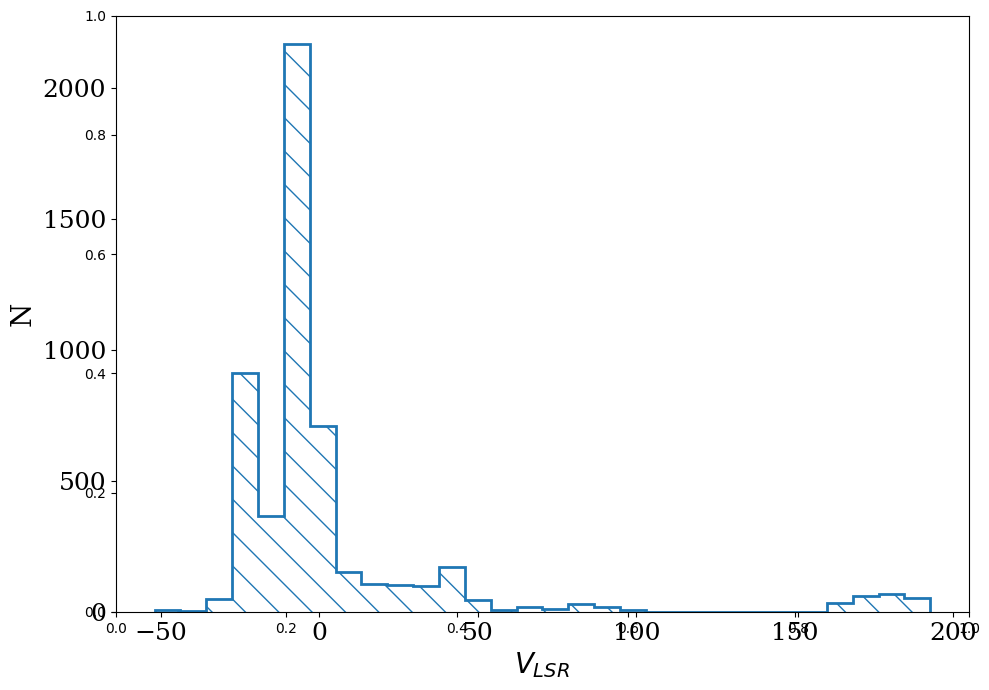

In [11]:
# making a histogram
make_histogram(data['VLSR'], r'$V_{LSR}$')